# IMPORTING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# DATA COLLECTION

In [3]:
df=pd.read_csv("boston.csv")

# PRE PROCESSING

In [70]:
df.shape

(506, 15)

In [71]:
print(df.keys())

Index(['Column1', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'Price'],
      dtype='object')


In [108]:
df.rename(columns={'medv':'Price'}, inplace=True)

In [109]:
df.head(5)

Column1     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0        0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1        1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2        2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3        3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4        4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio   black  lstat  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [110]:
df.tail(5)

Column1     crim   zn  indus  chas    nox     rm   age     dis  rad  tax  \
501      501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502      502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503      503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504      504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505      505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  Price  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  506 non-null    int64  
 1   crim     506 non-null    float64
 2   zn       506 non-null    float64
 3   indus    506 non-null    float64
 4   chas     506 non-null    int64  
 5   nox      506 non-null    float64
 6   rm       506 non-null    float64
 7   age      506 non-null    float64
 8   dis      506 non-null    float64
 9   rad      506 non-null    int64  
 10  tax      506 non-null    int64  
 11  ptratio  506 non-null    float64
 12  black    506 non-null    float64
 13  lstat    506 non-null    float64
 14  Price    506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [112]:
df.describe()

Column1        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.148861    2.105710    8.707259  168.537116    2.164946   
min      3.561000    2.900000    1.129600    1.000000  187.000000   12.600000   
25%      5.885500   45.025000    2.100175    4.000000  279.000000   17.400000   
50%      6.208500   77.500000    3.207450    5.000000  330.000000   19.050000   
75%      6.623500   94.075000    5.188425   24.000000  666.000000   20.200000   
max      8.780000  100.000000   12.126500   24.000000  711.000000   22.000000   

            black       lstat       Price  
count  506.000000  506.000000  506.000000  
mean   356.674032   12.653063   22.532806  
std     91.294864    7.141062    9.197104  
min      0.320000    1.730000    5.000000  
25%    375.377500    6.950000   17.025000  
50%    391.440000   11.360000   21.200000  
75%    396.225000   16.955000   25.000000  
max    396.900000   37.970000   50.000000

# EXPLORATORY DATA ANALYSIS

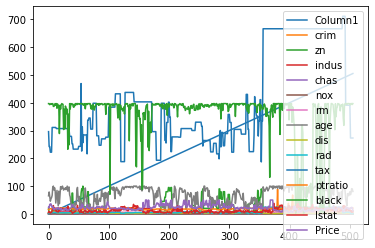

In [113]:
df.plot()
plt.show()

In [114]:
df.isna().sum()

Column1    0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
Price      0
dtype: int64

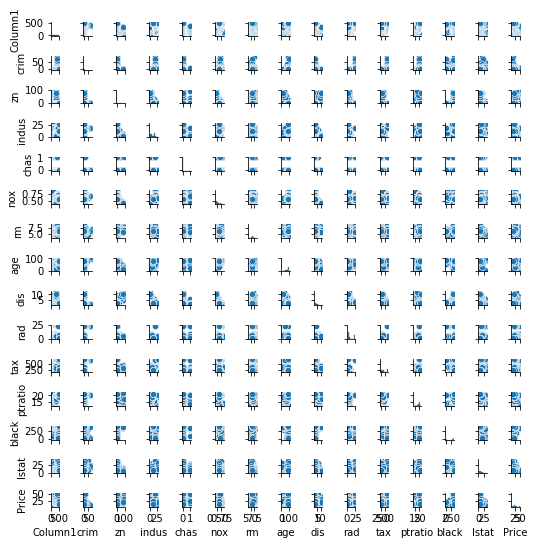

In [78]:
sns.pairplot(df, height=0.5)
plt.tight_layout()

In [115]:
df.corr()

Column1      crim        zn     indus      chas       nox        rm  \
Column1  1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736 -0.079971   
crim     0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
zn      -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
indus    0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
chas    -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
nox      0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
rm      -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
age      0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
dis     -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
rad      0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
tax      0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
ptratio  0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
black   -0.295041 -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069   
lstat    0.258465  0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
Price   -0.226604 -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360   

              age       dis       rad       tax   ptratio     black     lstat  \
Column1  0.203784 -0.302211  0.686002  0.666626  0.291074 -0.295041  0.258465   
crim     0.352734 -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621   
zn      -0.569537  0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995   
indus    0.644779 -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800   
chas     0.086518 -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929   
nox      0.731470 -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879   
rm      -0.240265  0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808   
age      1.000000 -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339   
dis     -0.747881  1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996   
rad      0.456022 -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676   
tax      0.506456 -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993   
ptratio  0.261515 -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044   
black   -0.273534  0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087   
lstat    0.602339 -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000   
Price   -0.376955  0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663   

            Price  
Column1 -0.226604  
crim    -0.388305  
zn       0.360445  
indus   -0.483725  
chas     0.175260  
nox     -0.427321  
rm       0.695360  
age     -0.376955  
dis      0.249929  
rad     -0.381626  
tax     -0.468536  
ptratio -0.507787  
black    0.333461  
lstat   -0.737663  
Price    1.000000

In [116]:
sns.heatmap(df.corr(),cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 5})


<AxesSubplot:>

In [117]:
sns.heatmap(df.isnull())

<AxesSubplot:>

# splitting dataset into x and y

In [118]:
X = df.iloc[:, :13]
X

Column1     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0          0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1          1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2          2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3          3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4          4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..       ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501      501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502      502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503      503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504      504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505      505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  
0    296     15.3  396.90  
1    242     17.8  396.90  
2    242     17.8  392.83  
3    222     18.7  394.63  
4    222     18.7  396.90  
..   ...      ...     ...  
501  273     21.0  391.99  
502  273     21.0  396.90  
503  273     21.0  396.90  
504  273     21.0  393.45  
505  273     21.0  396.90  

[506 rows x 13 columns]

In [119]:
Y = df.iloc[:,-1].values
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# TRAINING AND TESTING

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [121]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [122]:
training_accuracy=model.score(x_train,y_train)
print("the training accuracy is: ",training_accuracy)

the training accuracy is:  0.6546225158589227


In [123]:
testing_accuracy=model.score(x_test,y_test)
print("the testing accuracy is : ",testing_accuracy)

the testing accuracy is :  0.7211004344915171


# prediction

In [124]:
y_pred= model.predict(x_test)

In [125]:
r2_score(y_test,y_pred)

0.7211004344915171

In [126]:
mean_squared_error(y_test,y_pred)

24.802604062922807

In [127]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.980221286541674

In [128]:
model_accuracy=r2_score(Y,model.predict(X))*100
print("The model accuracy is : ",model_accuracy)

The model accuracy is :  67.77388309143018


In [129]:
predicted_house_price = model.predict(x_test)
print("Predicted House Prices")
print(predicted_house_price)


Predicted House Prices
[20.1898889  19.0652888  31.74338863 27.74095221  6.1407401  10.62312793
 29.19946802 21.74924941  5.98312055 20.64169502 30.85969376 27.74514422
 21.62871733 17.14699058 21.98847686 24.53655718 30.31742051 15.41012077
 13.26386438 18.10990528 20.03609694 20.44924497 35.64334582 20.08454023
 18.45973638 15.75559167 32.86931899 35.98503664 31.04622349 22.379495
 15.61846526 19.44427951 32.42384353 29.21567728 12.48320342 14.23605534
 15.83405081 24.41333791 26.54522621 23.8731787  29.6841436  14.84978332
 30.85505958  8.57914798 21.9682912  19.87004605 33.05710936 18.8093775
 33.07462142  4.46546678 30.98001912 34.46966618 11.2014892  33.90893603
 15.74647534 19.70572722 17.88460898 17.82427486 16.60657438 26.68349055
 20.93813829 13.05892131 19.1642487  30.93745483 34.94265845 24.18026096
 41.66303615 34.69756091 14.95539142 27.71558329 15.0365916  11.30401844
 18.36858203 18.29948863 31.99149478 21.45344977 21.98520224 24.35030562
 25.63862232 25.87149948 32.634

In [130]:
predicted = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})
print(predicted)

     Predicted_Prices  Actual_Prices
0           20.189889           20.2
1           19.065289           15.3
2           31.743389           37.3
3           27.740952           32.5
4            6.140740            8.8
..                ...            ...
162         21.230616           21.0
163         43.613871           50.0
164         21.797074           13.4
165          8.002694            5.0
166         23.193164           16.5

[167 rows x 2 columns]


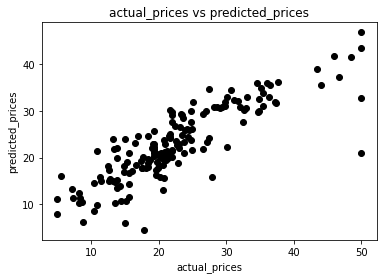

In [131]:
plt.scatter(y_test, predicted_house_price, color='black')
plt.title('actual_prices vs predicted_prices')
plt.xlabel('actual_prices')
plt.ylabel('predicted_prices')
plt.show()